<ipython-input-1-7efafed7fafb>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


     Age        BMI  Glucose  Insulin      HOMA   Leptin  Adiponectin  \
0     48  23.500000       70    2.707  0.467409   8.8071     9.702400   
1     83  20.690495       92    3.115  0.706897   8.8438     5.429285   
2     82  23.124670       91    4.498  1.009651  17.9393    22.432040   
3     68  21.367521       77    3.226  0.612725   9.8827     7.169560   
4     86  21.111111       92    3.549  0.805386   6.6994     4.819240   
..   ...        ...      ...      ...       ...      ...          ...   
111   45  26.850000       92    3.330  0.755688  54.6800    12.100000   
112   62  26.840000      100    4.530  1.117400  12.4500    21.420000   
113   65  32.050000       97    5.730  1.370998  61.4800    22.540000   
114   72  25.590000       82    2.820  0.570392  24.9600    33.750000   
115   86  27.180000      138   19.910  6.777364  90.2800    14.110000   

     Resistin    MCP.1  Classification  
0     7.99585  417.114               1  
1     4.06405  468.786               1  


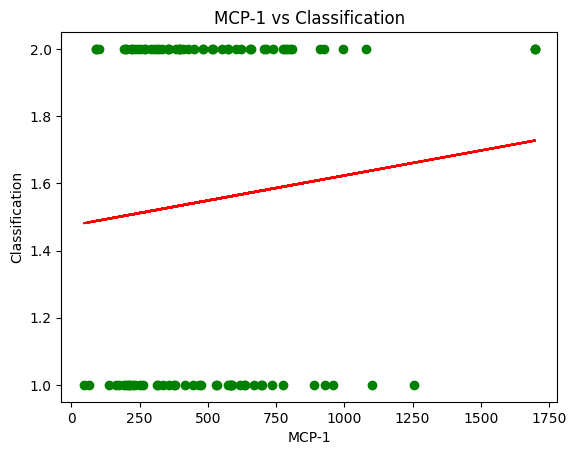

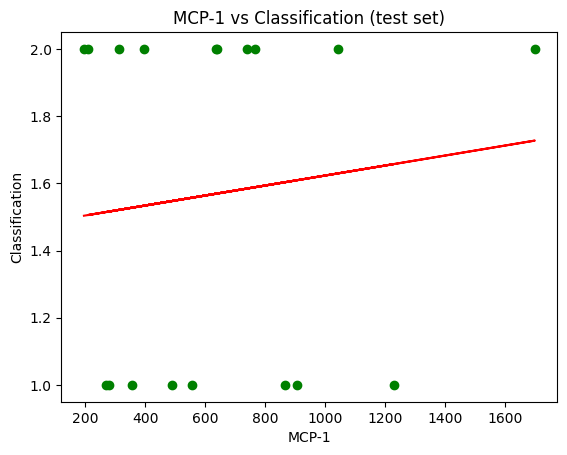

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv("dataR2.csv")
print(data)
X=data.iloc[:,8:9].values
print(X)
y=data.iloc[:,-1].values
print(y)
from sklearn.model_selection import train_test_split
X_train, x_test, y_train, y_test= train_test_split(X,y,test_size=0.15,random_state=0)
print(X_train)
print(x_test)
print(y_train)
print(y_test)
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train, y_train)
y_predict= regressor.predict(x_test)
print("\n The original values=",y_test)
print("\n The predicted values=",y_predict)
plt.scatter(X_train,y_train,color='green')
plt.plot(X_train, regressor.predict(X_train),color='red')
plt.title('MCP-1 vs Classification')
plt.xlabel('MCP-1')
plt.ylabel('Classification')
plt.show()
plt.scatter(x_test,y_test,color='green')
plt.plot(x_test, y_predict,color='red')
plt.title('MCP-1 vs Classification (test set)')
plt.xlabel('MCP-1')
plt.ylabel('Classification')
plt.show()

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Load the dataset
data = pd.read_csv("dataR2.csv")

# Use all features except the target
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train an SVM model
cl1 = SVC(kernel='linear', class_weight='balanced', random_state=0)
cl1.fit(X_train_scaled, y_train)

# Predictions
y_predict = cl1.predict(X_test_scaled)

# Evaluation
cm = confusion_matrix(y_test, y_predict)
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_predict))
accuracy = accuracy_score(y_test, y_predict)
print("\nAccuracy:", accuracy)


Confusion Matrix:
 [[11  0]
 [ 1 12]]

Classification Report:
               precision    recall  f1-score   support

           1       0.92      1.00      0.96        11
           2       1.00      0.92      0.96        13

    accuracy                           0.96        24
   macro avg       0.96      0.96      0.96        24
weighted avg       0.96      0.96      0.96        24


Accuracy: 0.9583333333333334


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
data = pd.read_csv("dataR2.csv")
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Predicted values by KNN:", y_pred)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)



Predicted values by KNN: [2 2 1 2 1 2 1 1 1 1 2 1 2 2 1 2 1 2 2 2 1 2 2 1]
Confusion Matrix:
 [[10  1]
 [ 1 12]]

Classification Report:
               precision    recall  f1-score   support

           1       0.91      0.91      0.91        11
           2       0.92      0.92      0.92        13

    accuracy                           0.92        24
   macro avg       0.92      0.92      0.92        24
weighted avg       0.92      0.92      0.92        24


Accuracy: 0.9166666666666666


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
data = pd.read_csv("dataR2.csv")
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.naive_bayes import GaussianNB
cl1=GaussianNB()
cl1.fit(X_train, y_train)

y_predict=cl1.predict(X_test)
print(y_predict)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)


[1 1 2 2 1 1 1 1 1 1 1 1 1 2 1 2 1 2 2 2 1 2 2 1]
Confusion Matrix:
 [[10  1]
 [ 1 12]]

Classification Report:
               precision    recall  f1-score   support

           1       0.91      0.91      0.91        11
           2       0.92      0.92      0.92        13

    accuracy                           0.92        24
   macro avg       0.92      0.92      0.92        24
weighted avg       0.92      0.92      0.92        24


Accuracy: 0.9166666666666666


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Load the dataset
data = pd.read_csv("dataR2.csv")

# Use all features except the target
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train an SVM model
cl1 = LinearSVC( class_weight='balanced',max_iter=100,tol=0.001,loss='hinge')
cl1.fit(X_train_scaled, y_train)

# Predictions
y_predict = cl1.predict(X_test_scaled)

# Evaluation
cm = confusion_matrix(y_test, y_predict)
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_predict))
accuracy = accuracy_score(y_test, y_predict)
print("\nAccuracy:", accuracy)


/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Confusion Matrix:
 [[11  0]
 [ 1 12]]

Classification Report:
               precision    recall  f1-score   support

           1       0.92      1.00      0.96        11
           2       1.00      0.92      0.96        13

    accuracy                           0.96        24
   macro avg       0.96      0.96      0.96        24
weighted avg       0.96      0.96      0.96        24


Accuracy: 0.9583333333333334
